In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
from rdkit.Chem.Scaffolds.MurckoScaffold import MakeScaffoldGeneric

# Convert output sets to format compatibile with scripts to calculate metrics

## Molpher

In [14]:
receptor = 'Leukocyte_elastase' 
type_cluster = 'dis'
number = 4

In [15]:
df = pd.read_csv(f"data/output_sets_new/{receptor}/cOS_Molpher_{type_cluster}_{number}_all_columns.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,CHEMBL3902357,CHEMBL3926710,COCCCN1C(=O)N(c2cccc(C(F)(F)F)c2)C2=C(C(=O)CC2...,CCOC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N(C)C...,COCCCN1C(=O)N(C2=CC=CC(C(F)(F)F)=C2)C2=C(C(=O)...,0.790164,16,52.810135,C1CCC(C2CCC(C3CCCCC3)C3CCCC23)CC1,C1CCC(C2CCC(C3CCCCC3C3CCCCC3)CC2)CC1
1,CHEMBL3902357,CHEMBL3926710,COCCCN1C(=O)N(c2cccc(C(F)(F)F)c2)C2=C(C(=O)CC2...,CCOC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N(C)C...,COCCCN1C(=O)N(C2=CC=CC(C(F)(F)F)=C2)C(C)=C(C(C...,0.790164,16,52.810135,C1CCC(C2CCC(C3CCCCC3)C3CCCC23)CC1,C1CCC(C2CCC(C3CCCCC3C3CCCCC3)CC2)CC1
2,CHEMBL3902357,CHEMBL3926710,COCCCN1C(=O)N(c2cccc(C(F)(F)F)c2)C2=C(C(=O)CC2...,CCOC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N(C)C...,COCCCN1C(=O)N(C2=CC=CC(C(F)(F)F)=C2)C(C)=C(C(=...,0.790164,16,52.810135,C1CCC(C2CCC(C3CCCCC3)C3CCCC23)CC1,C1CCC(C2CCC(C3CCCCC3C3CCCCC3)CC2)CC1
3,CHEMBL3902357,CHEMBL3926710,COCCCN1C(=O)N(c2cccc(C(F)(F)F)c2)C2=C(C(=O)CC2...,CCOC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N(C)C...,COCCCCN1C(=O)N(C2=CC=CC(C(F)(F)F)=C2)C(C)=C(C(...,0.790164,16,52.810135,C1CCC(C2CCC(C3CCCCC3)C3CCCC23)CC1,C1CCC(C2CCC(C3CCCCC3C3CCCCC3)CC2)CC1
4,CHEMBL3902357,CHEMBL3926710,COCCCN1C(=O)N(c2cccc(C(F)(F)F)c2)C2=C(C(=O)CC2...,CCOC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N(C)C...,COC(=O)C1=C(C)N(C2=CC=CC(C(F)(F)F)=C2)C(=O)N(C...,0.790164,16,52.810135,C1CCC(C2CCC(C3CCCCC3)C3CCCC23)CC1,C1CCC(C2CCC(C3CCCCC3C3CCCCC3)CC2)CC1
...,...,...,...,...,...,...,...,...,...,...
1721136,CHEMBL293138,CHEMBL408621,CC(SC(=O)c1cccs1)C(=O)NCC(=O)N1CSCC1C(=O)O,CC1(C)C2CC[C@]1(C)C(OC(=O)/C=C/c1cc(O)c(O)c(O)...,CC1=CC(C=CC(=O)OC2CC3CCC2(C)C3(C)C)=CC=C1O,0.199458,76,2319.140899,C(CCCC1CCCC1)CCCC1CCCC1,C1CCC(CCCCC2CC3CCC2C3)CC1
1721137,CHEMBL293138,CHEMBL408621,CC(SC(=O)c1cccs1)C(=O)NCC(=O)N1CSCC1C(=O)O,CC1(C)C2CC[C@]1(C)C(OC(=O)/C=C/c1cc(O)c(O)c(O)...,CC1=CC(C=CC(=O)OC2CC3CCC2(C)C3(C)C)=CC(O)=C1O,0.199458,76,2319.140899,C(CCCC1CCCC1)CCCC1CCCC1,C1CCC(CCCCC2CC3CCC2C3)CC1
1721138,CHEMBL293138,CHEMBL408621,CC(SC(=O)c1cccs1)C(=O)NCC(=O)N1CSCC1C(=O)O,CC1(C)C2CC[C@]1(C)C(OC(=O)/C=C/c1cc(O)c(O)c(O)...,CCC1=CC(C=CC(=O)OC2CC3CCC2(C)C3(C)C)=CC(O)=C1O,0.199458,76,2319.140899,C(CCCC1CCCC1)CCCC1CCCC1,C1CCC(CCCCC2CC3CCC2C3)CC1
1721139,CHEMBL293138,CHEMBL408621,CC(SC(=O)c1cccs1)C(=O)NCC(=O)N1CSCC1C(=O)O,CC1(C)C2CC[C@]1(C)C(OC(=O)/C=C/c1cc(O)c(O)c(O)...,CC1(C)C2CCC1(C)C(OC(=O)C=CC1=CC(O)=C(O)C(CO)=C...,0.199458,76,2319.140899,C(CCCC1CCCC1)CCCC1CCCC1,C1CCC(CCCCC2CC3CCC2C3)CC1


In [16]:
morphs = df[4]
len(morphs)

1721141

In [17]:
morphs.to_csv(f"data/output_sets_new/{receptor}/cOS_Molpher_{type_cluster}_{number}_one_column.csv", header=None, index = False)

## DrugEx

In [4]:
numbers = [0]
receptor = 'Glucocorticoid_receptor' 
type_cluster = 'sim'
generator = 'DrugEx_epsilon_0.2' # oprions: DrugEx | DrugEx3(with new parameters, update numbers of epochs)

In [5]:
for number in numbers:
    df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")
    delete_row = df.index[df.SMILES=='SMILES'].tolist()
    df = df.drop(delete_row)
    morphs = df.SMILES.drop_duplicates(keep='last')
    print(len(morphs))

    morphs.to_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_one_column.csv", header=False, index=False)

10000


In [58]:

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
numbers = [2,3,4]
receptor = 'Glucocorticoid_receptor' 
type_cluster = 'sim'
generator = 'DrugEx_GT' # oprions: DrugEx | DrugEx3(with new parameters, update numbers of epochs)

In [26]:
for number in numbers:
    df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")
    delete_row = df.index[df.SMILES=='SMILES'].tolist()
    df = df.drop(delete_row)
    print("DF1 ", len(df))
    morphs = df.drop_duplicates(subset='SMILES', keep='last')
    # Převod na numerické hodnoty
    morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
    morphs[f'QSPRPRED_reshape'] = pd.to_numeric(morphs[f'QSPRPRED_reshape'], errors='coerce')
    print("DF2 ", len(morphs))
    morphs = morphs[[f'QSPRPRED_reshape', 'SA']]
    morphs.columns = ['pchembl', 'SA']
    #print(morphs)
    morphs.to_csv(f"data/output_sets/{receptor}/{generator}_pchembl_sa_{type_cluster}_{number}.csv", index=False)




/tmp/ipykernel_6538/2678728452.py:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")


DF1  1000000


/tmp/ipykernel_6538/2678728452.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
/tmp/ipykernel_6538/2678728452.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs[f'QSPRPRED_reshape'] = pd.to_numeric(morphs[f'QSPRPRED_reshape'], errors='coerce')


DF2  899657


In [9]:
for number in numbers:
    df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")
    delete_row = df.index[df.SMILES=='SMILES'].tolist()
    df = df.drop(delete_row)
    print(df[:1])
    print("DF1 ", len(df))
    morphs = df.drop_duplicates(subset='SMILES', keep='last')
    # Převod na numerické hodnoty
    morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
    morphs[f'QSPRPRED_reshape'] = pd.to_numeric(morphs[f'QSPRPRED_reshape'], errors='coerce')
    print("DF2 ", len(morphs))
    # Filtrování na základě obou podmínek
    filtered_morphs = morphs[(morphs['SA'] <= 6) & (morphs[f'QSPRPRED_reshape'] >= 7)]
    print("DF3 ", len(filtered_morphs))
    filtered_morphs.SMILES.to_csv(f"data/output_sets/{receptor}/cOS_{generator}_desired_{type_cluster}_{number}_one_column.csv", header=False, index=False)


    # Nastavení velikosti grafu
    #plt.figure(figsize=(12, 6))
#
    ## Plot pro SA
    #plt.subplot(1, 2, 1)
    #sns.histplot(morphs['SA'].dropna(), kde=True, color='blue', bins=20)
    #plt.title('Histogram of SA')
    #plt.xlabel('SA')
    #plt.ylabel('Frequency')
#
    ## Plot pro QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_dis_0
    #plt.subplot(1, 2, 2)
    #sns.histplot(morphs[f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}'].dropna(), kde=True, color='green', bins=20)
    #plt.title(f'Histogram of QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}')
    #plt.xlabel(f'QSPRpred_cIS_Glucocorticoid_receptor_with_p_chembl_{type_cluster}_{number}')
    #plt.ylabel('Frequency')
#
    ## Zobrazení grafu
    #plt.tight_layout()
    #plt.show()
#

/var/tmp/pbs.102393.lich-compute.vscht.cz/ipykernel_25909/3668371988.py:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")


                                            SMILES   Frags Valid Accurate  \
0  COc1cc2cc(S(=O)(=O)NCC(C)c3ccc(F)cc3)ccc2cc1C#N  CCC.CO   1.0      1.0   

  Desired QSPRPRED_reshape     SA  
0     0.0            5.446  2.729  
DF1  1000000


/var/tmp/pbs.102393.lich-compute.vscht.cz/ipykernel_25909/3668371988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
/var/tmp/pbs.102393.lich-compute.vscht.cz/ipykernel_25909/3668371988.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs[f'QSPRPRED_reshape'] = pd.to_numeric(morphs[f'QSPRPRED_reshape'], errors='coerce')


DF2  898760
DF3  529037


/var/tmp/pbs.102393.lich-compute.vscht.cz/ipykernel_25909/3668371988.py:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")


                                              SMILES  \
0  Cc1ncccc1NC(=O)c1ccc2c(c1)C=CC1CC(O)(C(F)(F)F)...   

                           Frags Valid Accurate Desired QSPRPRED_reshape  \
0  FC(F)F.OC1CCC2c3ccccc3C=CC2C1   1.0      1.0     1.0            8.184   

      SA  
0  3.942  
DF1  1000000


/var/tmp/pbs.102393.lich-compute.vscht.cz/ipykernel_25909/3668371988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
/var/tmp/pbs.102393.lich-compute.vscht.cz/ipykernel_25909/3668371988.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs[f'QSPRPRED_reshape'] = pd.to_numeric(morphs[f'QSPRPRED_reshape'], errors='coerce')


DF2  907063
DF3  517842


/var/tmp/pbs.102393.lich-compute.vscht.cz/ipykernel_25909/3668371988.py:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_all_columns.csv")


                                              SMILES  \
0  CC#CC1(O)CCC2C3CCC4=CC(=O)CCC4=C3C(c3cc(C)c(OC...   

                                     Frags Valid Accurate Desired  \
0  CC#CC1(O)CCC2C3CCC4=CC(=O)CCC4=C3CCC21C   1.0      1.0     1.0   

  QSPRPRED_reshape     SA  
0            8.235  4.487  
DF1  1000000


/var/tmp/pbs.102393.lich-compute.vscht.cz/ipykernel_25909/3668371988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs['SA'] = pd.to_numeric(morphs['SA'], errors='coerce')
/var/tmp/pbs.102393.lich-compute.vscht.cz/ipykernel_25909/3668371988.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphs[f'QSPRPRED_reshape'] = pd.to_numeric(morphs[f'QSPRPRED_reshape'], errors='coerce')


DF2  899657
DF3  494713


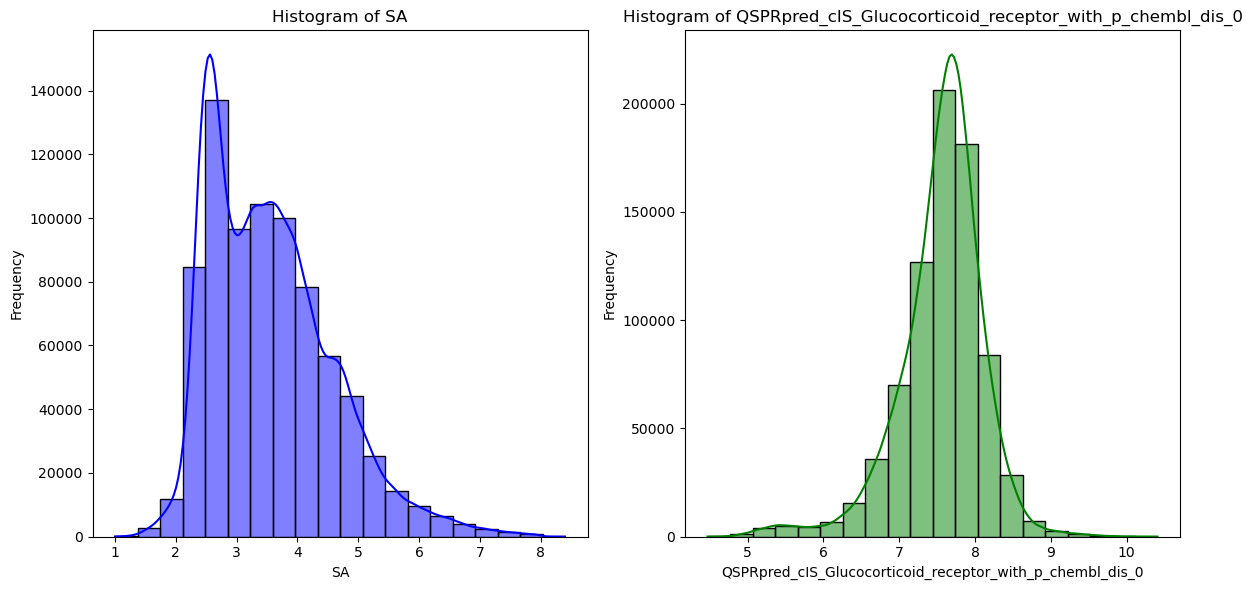

# REINVENT

In [13]:
number = 0
receptor = 'Glucocorticoid_receptor' 
type_cluster = 'dis'
generator = 'REINVENTn' 

In [15]:
df = pd.read_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_one_column.csv")
df

,SMILES,NLL
0,Cc1ccc(N(C(=O)c2csnn2)C(C(=O)NC(C)(C)C)c2ccco2...,23.803497
1,Cn1c(=O)[nH]c2cc(-c3cc4cnn(-c5ccc6c(c5)CCC6)c4...,32.488194
2,O=S(=O)(N=c1cc[nH]c(=Nc2ccccc2C2CC2)[nH]1)C(F)...,28.983135
3,CC1(C)CC(C(O)(Cc2ccc3c(c2)OC(F)(F)O3)c2cccc(F)...,26.833748
4,O=C(NCCS)c1cnccc1C(F)(F)F,25.808182
...,...,...
935400,COc1ccc2c(c1)CC(C)(C)N(c1ccc(C(C)N(C)C(=O)CN(C...,26.185453
935401,CC1=NC(C)=C(C(=O)OCc2ccccc2)C(C(F)(F)F)C1,24.012506
935402,Cc1noc(=O)c2ccc(NC(CC3CCN(C(=O)OC(C)(C)C)CC3)(...,29.085760
935403,Fc1ccc(-c2[nH]c(CNc3cccc(C(F)F)c3)nc2-c2ccc3nc...,24.837856


In [16]:
virtual_compounds = df.SMILES
len(virtual_compounds)

935405

In [17]:
virtual_compounds.to_csv(f"data/output_sets/{receptor}/cOS_{generator}_{type_cluster}_{number}_one_column.csv", header=False, index=False)

In [2]:
pwd

'/home/filv/phd_projects/iga_2023/git_reccal/new/recall_metrics'

In [5]:
df = pd.read_csv("data/output_sets/Glucocorticoid_receptor/RL_dis_final_1.csv")
df

,Agent,Prior,Target,Score,SMILES,SMILES_state,SAScore,SAScore (raw),QSAR,QSAR (raw),step
0,36.5722,36.5722,24.8532,0.4798858,O=C(CNC(=O)c1cc(Cl)ccc1Br)NCC(=O)NC(Cc1c[nH]c2...,1,0.5888531,2.8659,0.4690979,0.4691,1
1,20.2209,20.2209,73.6989,0.7337485,CCN(CC(O)(CNc1cccc2c1cnn2-c1ccc(Br)cc1)C(F)(F)...,1,0.3726996,3.3168,0.7911063,0.7911,1
2,38.2675,38.2675,41.4851,0.6230669,CCc1nc(-c2c(C)cc(Cl)cc2OCCn2cc(Cl)cn2)cc(-c2c(...,1,0.5490900,2.9490,0.6318787,0.6319,1
3,37.2985,37.2985,10.1184,0.3704444,N#CCCOC1CC(n2cnc3c(C#N)cc(Cl)cc32)CC1F,1,0.1010946,4.1698,0.4279462,0.4279,1
4,39.1280,39.1280,15.8611,0.4296019,CC(C)=C(Cl)C(N)Oc1ccc(-c2nc(-c3ccc(N=C(N)c4ccc...,1,0.3495890,3.3682,0.4395533,0.4396,1
...,...,...,...,...,...,...,...,...,...,...,...
988288,34.5464,34.5464,33.2591,0.5297304,Fc1ccc(-n2c(-c3ccncc3)c(CN3CCCCC3Cn3cncn3)c3cc...,1,0.3651760,3.3334,0.5520840,0.5521,1
988289,26.8833,26.8833,19.8076,0.3647727,Cc1ccc(-n2nnnc2-c2ccc(Cl)cc2N)cc1,1,0.8652785,2.0969,0.3313910,0.3314,1
988290,31.5010,31.5010,37.6496,0.5402391,CCOc1cc(F)c(-c2noc(-c3c(Cl)cc(OCC(C)(C)NC(C)C(...,1,0.2592558,3.5880,0.5861579,0.5862,1
988291,30.3840,30.3840,28.0406,0.4564419,Cc1nc(-c2cccc(OC(CC(=O)O)c3cc(Cl)ccc3-c3ccccc3...,1,0.5485390,2.9502,0.4472150,0.4472,1


In [6]:
delete_row = df.index[df.SMILES=='SMILES'].tolist()
df = df.drop(delete_row)
df = df.reset_index(drop=True)
#pri odstraneni duplikaci spis odstranit neaktivni podle hodnot SAcore a QSAR
morphs = df.SMILES.drop_duplicates(keep='last')
print(len(morphs))

morphs.to_csv(f"data/output_sets/Glucocorticoid_receptor/cOS_REINVENTnew_dis_0_one_column.csv", header=False, index=False)


656643
